In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeon.datasets import load_classification
import seaborn as sns


In [2]:
X_train, y_train = load_classification(name='ECG200', split='TRAIN')

In [3]:
y_train

array(['-1', '1', '-1', '-1', '1', '1', '-1', '-1', '1', '1', '1', '1',
       '1', '1', '-1', '1', '1', '1', '-1', '-1', '1', '1', '1', '-1',
       '1', '1', '1', '-1', '1', '1', '1', '1', '1', '1', '1', '-1', '1',
       '1', '1', '1', '1', '1', '1', '-1', '-1', '1', '-1', '-1', '1',
       '-1', '1', '1', '1', '-1', '1', '1', '-1', '-1', '1', '1', '1',
       '-1', '1', '1', '1', '-1', '1', '1', '1', '1', '1', '1', '-1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '-1', '-1', '-1',
       '-1', '1', '-1', '1', '-1', '1', '1', '-1', '1', '1', '-1', '-1',
       '1', '1'], dtype='<U2')

In [20]:
# Periodic activations

def sine(x: np.ndarray):
    return np.sin(x)

def cosine(x: np.ndarray):
    return np.cos(x)

# Bounded activations

def tanh(x: np.ndarray):
    return np.tanh(x)

def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

# Linear Unit family activations

def relu(x: np.ndarray):
    return np.where(x >= 0, x, 0)

def prelu(x: np.ndarray, alpha: float = 0.1):
    return np.where(x >= 0, x, alpha * x)

def elu(x: np.ndarray, alpha: float = 1.):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def mish(x: np.ndarray):
    def softplus(x: np.ndarray):
        return np.log1p(np.exp(-np.abs(x))) + np.maximum(x, 0)
    return x * np.tanh(softplus(x))

def selu(x: np.ndarray):
    scale = 1.0507009873554804934193349852946
    alpha = 1.6732632423543772848170429916717
    return scale * (np.where(x > 0, x, 0) + np.where(x <= 0, alpha * (np.exp(x) - 1), 0))

def silu(x: np.ndarray):
    return x * sigmoid(x)
# Semi-periodic activations

def snake(x: np.ndarray):
    return np.sin(x) ** 2 + x

def leaky_sinelu(x: np.ndarray):
    return np.where(x >= 0, (np.sin(x) ** 2) + x, 0.5 * ((np.sin(x) ** 2) + x))


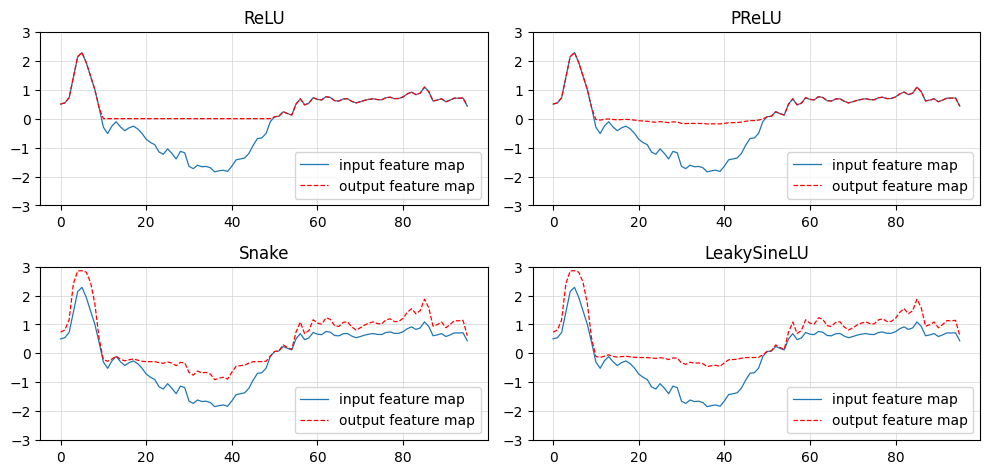

In [21]:
LINEWIDTH = 0.9
x = np.arange(-25, 25, 0.01)

activations = {
    # 'Sigmoid': sigmoid,
    # 'Tanh': tanh,
    # 'Sine': sine,
    # 'Cosine': cosine,
    'ReLU': relu,
    'PReLU': prelu,
    # 'ELU': elu,
    # 'Mish': mish,
    # 'SiLU': silu,
    # 'SELU': selu,
    'Snake': snake,
    'LeakySineLU': leaky_sinelu,
}

fig = plt.figure(figsize=(10, 14))


for idx, activation in enumerate(activations.keys()):
    ax = fig.add_subplot(6, 2, idx + 1)

    sns.lineplot(x=list(range(X_train.shape[-1])), y=X_train[y_train == '-1'][0, 0, :], ax=ax, label='input feature map', linewidth=LINEWIDTH).set_title(f'{activation}')
    sns.lineplot(x=list(range(X_train.shape[-1])), y=activations[activation](X_train[y_train == '-1'][0, 0, :]),
                 ax=ax, linewidth=LINEWIDTH, linestyle='dashed', color='red', label=f'output feature map')

    ax.set_ylim((-3, 3))
    ax.grid(linewidth=0.5, color='lightgray')
    ax.legend(loc='lower right')

plt.tight_layout()

plt.savefig('../figures/activations_comparinson.pdf')

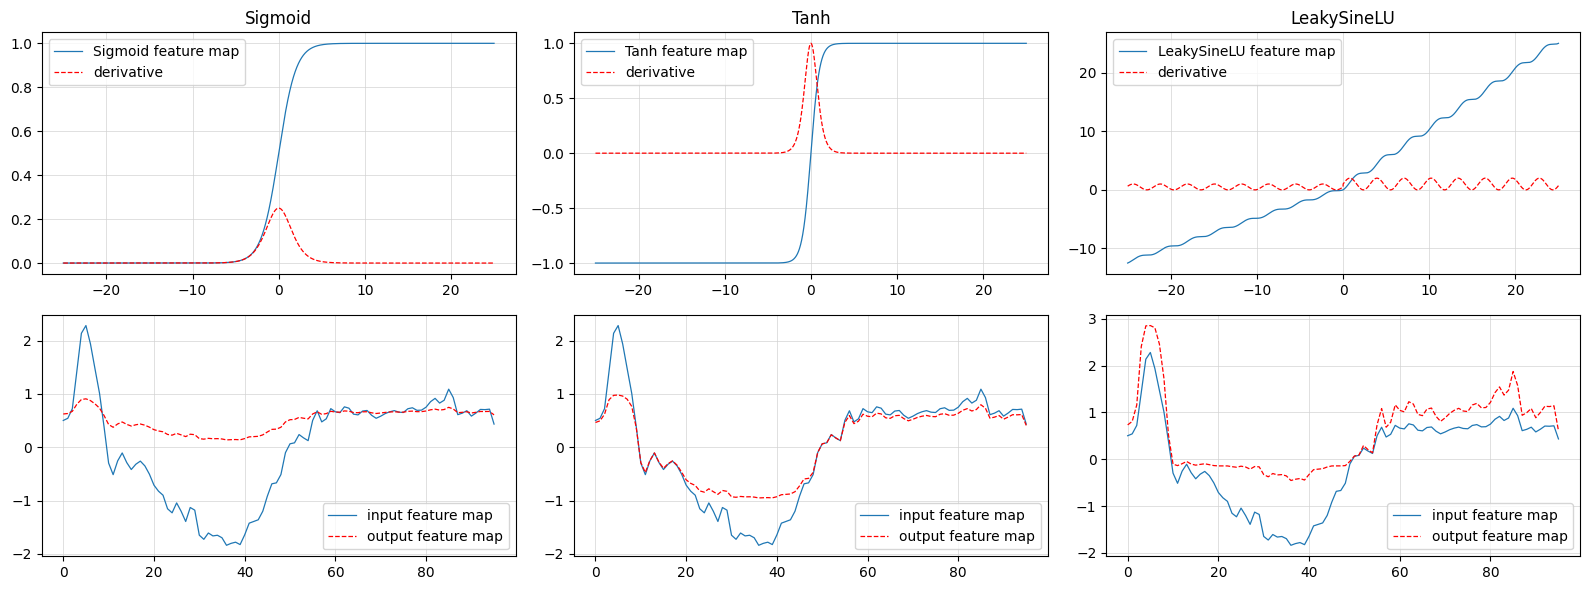

In [43]:
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
    
def dtanh(x):
    return 1 - (np.tanh(x) ** 2)

def dleaky_sinelu(x):
    return np.where(x > 0, 2 * (np.cos(x) * np.sin(x)) + 1, 0.5 * (2 * (np.cos(x) * np.sin(x)) + 1))

    
LINEWIDTH = 0.9
x = np.arange(-25, 25, 0.01)

activations = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    # 'Sine': sine,
    # 'Cosine': cosine,
    # 'ReLU': relu,
    # 'PReLU': prelu,
    # 'ELU': elu,
    # 'Mish': mish,
    # 'SiLU': silu,
    # 'SELU': selu,
    # 'Snake': snake,
    'LeakySineLU': leaky_sinelu,
}

derivatives = {
    'Sigmoid': dsigmoid,
    'Tanh': dtanh,
    'LeakySineLU': dleaky_sinelu,
}

fig = plt.figure(figsize=(16, 6))


for idx, activation in enumerate(activations.keys()):
    ax = fig.add_subplot(2, 3, idx + 1)

    sns.lineplot(x=x, y=activations[activation](x), ax=ax, label=f'{activation} feature map', linewidth=LINEWIDTH).set_title(f'{activation}')
    sns.lineplot(x=x, y=derivatives[activation](x),
                 ax=ax, linewidth=LINEWIDTH, linestyle='dashed', color='red', label=f'derivative')

    # ax.set_ylim((-3, 3))
    ax.grid(linewidth=0.5, color='lightgray')
    ax.legend(loc='upper left')
    
for idx, activation in enumerate(activations.keys()):
    ax = fig.add_subplot(2, 3, 3 + idx + 1)

    sns.lineplot(x=list(range(X_train.shape[-1])), y=X_train[y_train == '-1'][0, 0, :], ax=ax, label='input feature map', linewidth=LINEWIDTH)
    sns.lineplot(x=list(range(X_train.shape[-1])), y=activations[activation](X_train[y_train == '-1'][0, 0, :]),
                 ax=ax, linewidth=LINEWIDTH, linestyle='dashed', color='red', label=f'output feature map')

    # ax.set_ylim((-3, 3))
    ax.grid(linewidth=0.5, color='lightgray')
    ax.legend(loc='lower right')

plt.tight_layout()

plt.savefig('../figures/boundness_activations_comparinson.pdf')

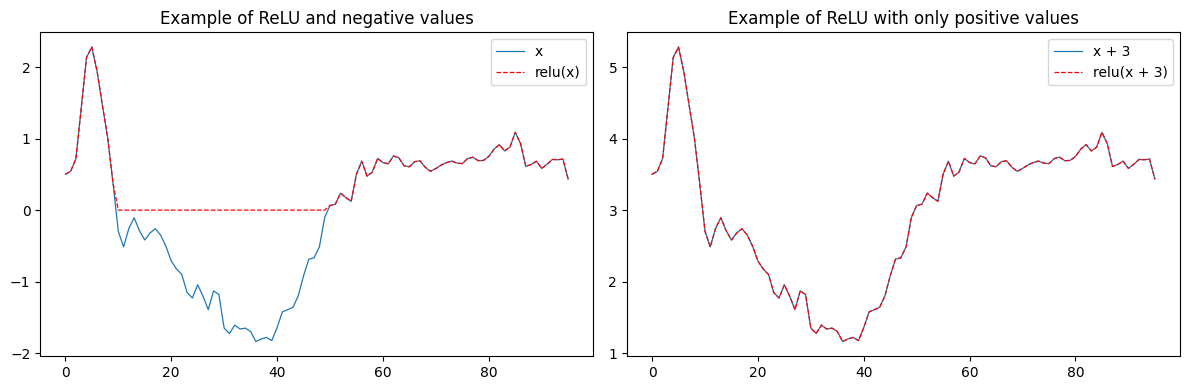

In [59]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)

sns.lineplot(x=list(range(X_train.shape[-1])), y=X_train[y_train == '-1'][0, 0, :], ax=ax, label='x', linewidth=LINEWIDTH).set_title(f'Example of ReLU and negative values')
sns.lineplot(x=list(range(X_train.shape[-1])), y=relu(X_train[y_train == '-1'][0, 0, :]), ax=ax, linewidth=LINEWIDTH, linestyle='dashed', color='red', label=f'relu(x)')

ax = fig.add_subplot(1, 2, 2)

sns.lineplot(x=list(range(X_train.shape[-1])), y=X_train[y_train == '-1'][0, 0, :] + 3, ax=ax, label='x + 3', linewidth=LINEWIDTH).set_title('Example of ReLU with only positive values')
sns.lineplot(x=list(range(X_train.shape[-1])), y=relu(X_train[y_train == '-1'][0, 0, :] + 3), ax=ax, linewidth=LINEWIDTH, linestyle='dashed', color='red', label=f'relu(x + 3)')

plt.tight_layout()
plt.savefig('../figures/relu_example.pdf')